1.14%


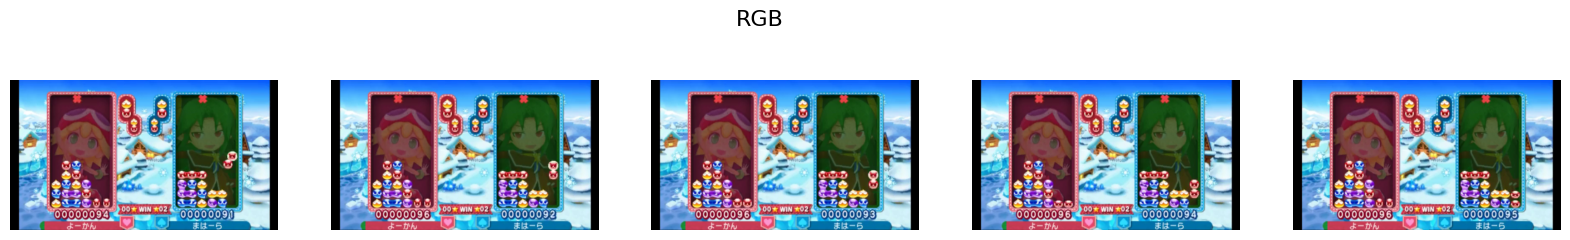

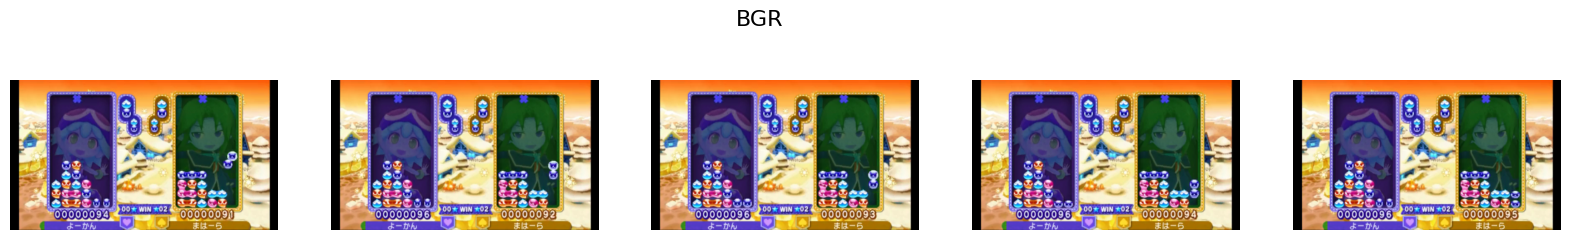

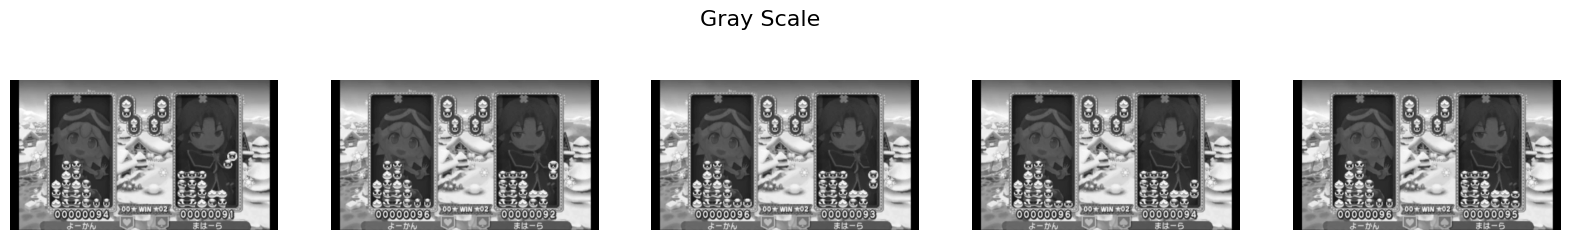

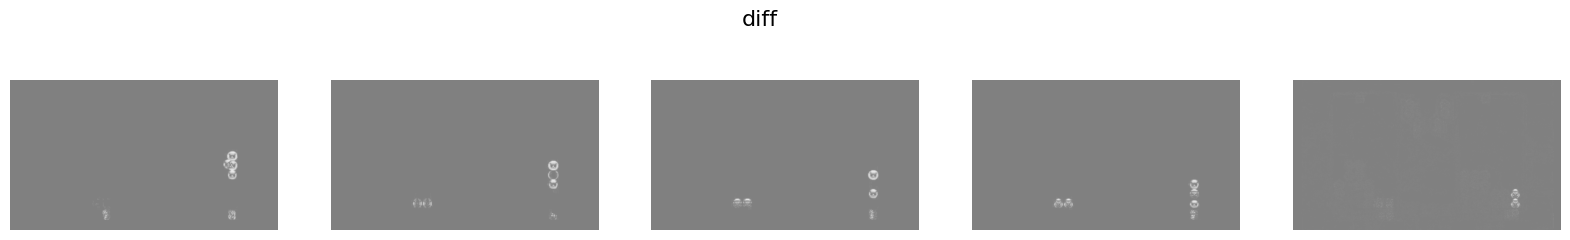

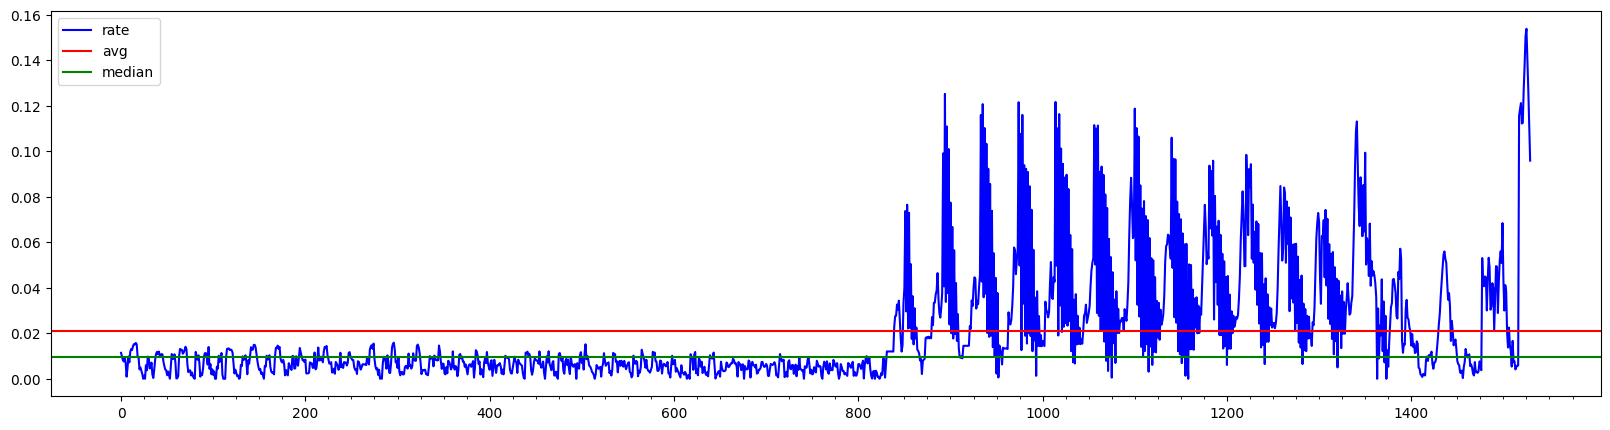

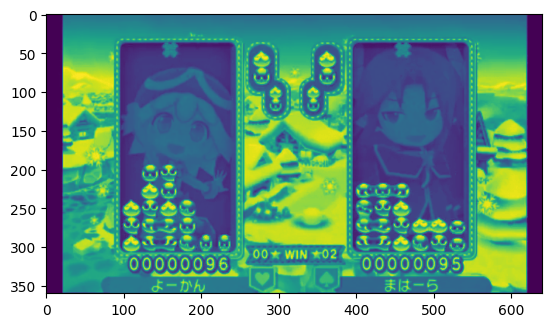

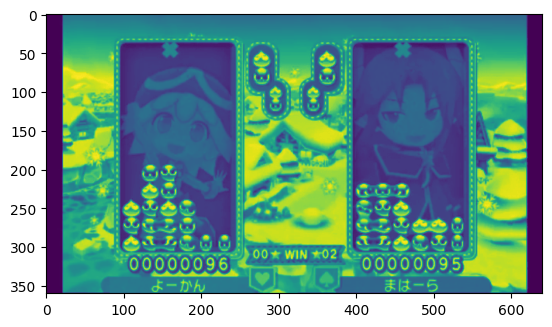

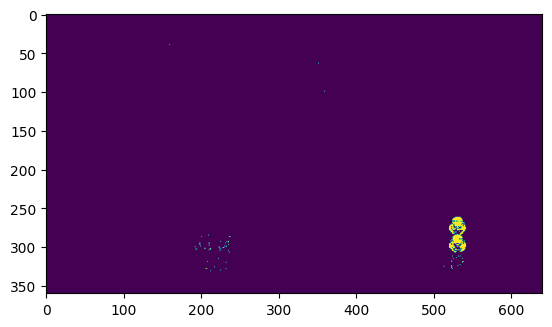

In [14]:
from os import major
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
# 動画の開始フレーム
frameIndex = 9005

# 動画読み込み
cap = cv2.VideoCapture("./resources/puyo_battle.mp4")

fps = cap.get(cv2.CAP_PROP_FPS)
w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
sec = frame_count / fps

fps, frame_count, round(sec, 3), (h, w)

# 動画から画像を抽出
n_frames = int(51 * fps + 1)
n_frames
frames = []
while True:
    # generator にしたほうが使いやすい
    ret, frame = cap.read()
    if not ret:
        print("read error")
        break

    frames.append(frame)
    if len(frames) == n_frames:
        break

frame_st = 225
frame_ed = 230
frame_range = frames[frame_st:frame_ed]
# # context manager として扱えるようにし、releaseを意識しないようにしたほうがいい
# if cap.isOpened():
#     cap.release()

# fig: 描画領域全体
# axes: 個別の描画領域の座標
# figsize: 全体の描画領域のサイズ
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
for frame, ax in zip(frame_range, axes):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    ax.imshow(rgb_frame)
    # 描画領域の目盛りを消す
    ax.axis("off")
fig.suptitle("RGB", fontsize=16)

# BGR出力
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
for frame, ax in zip(frame_range, axes):
    ax.imshow(frame)
    ax.axis("off")
fig.suptitle("BGR", fontsize=16)

# グレースケール出力
gray_frames = [cv2.cvtColor(f, cv2.COLOR_BGR2GRAY) for f in frames]
gray_frame_range = gray_frames[frame_st:frame_ed]
gray_frame_range2 = gray_frames[frame_st+1:frame_ed+ 1]
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
for frame, ax in zip(gray_frame_range, axes):
    ax.imshow(frame, cmap="gray", vmin=0, vmax=255)
    ax.axis("off")
_ = fig.suptitle("Gray Scale", fontsize=16)

# 差分出力
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
for bef, aft, ax in zip(gray_frame_range, gray_frame_range2, axes):
    diff_frame = cv2.absdiff(aft, bef)
    ax.imshow(diff_frame, cmap="gray", vmin=-255, vmax=255)
    ax.axis("off")

_ = fig.suptitle("diff", fontsize=16)

# 全フレームの差分から異なるピクセル数を取得
diff_frames = [cv2.absdiff(aft, bef) for bef, aft in zip(gray_frames, gray_frames[1:])]
for i, x in enumerate(diff_frames):
    th = 30
    x[x < th] = 0
    x[x >= th] = 255
    diff_frames[i] = x
# 1フレーム目の差分情報取得
# ここを調整すれば差分のノイズが消せる?
# https://note.nkmk.me/python-numpy-ndarray-compare/
n_diff_pixels = (diff_frames[0] != 0).sum()

area = w * h
print("{:.2%}".format(n_diff_pixels / area))

# 全体でどこでフレーム間の
fig = plt.figure(figsize=(20, 5))

diff_rates = np.array([(d != 0).sum() / area for d in diff_frames])
# 変化率の平均
mean = diff_rates.mean()
# 変化率の中央値
median = np.median(diff_rates)

ax=plt.gca()

plt.plot(diff_rates, color="blue", label="rate")
plt.axhline(mean, color="red", label="avg")
_ = plt.axhline(median, color="green", label="median")
# plt.grid(major=True)
ax.set_xticks(np.arange(0, 1600, 200))
ax.set_xticks(np.arange(0, 1600, 25), minor=True)
# ax.set_yticks(np.linspace(0, 1, 20), minor=True)

plt.legend()
plt.show()

plt.imshow(gray_frames[229])
plt.show()

plt.imshow(gray_frames[230])
plt.show()

th = 30
mask = cv2.absdiff(gray_frames[229], gray_frames[230])
mask[mask < th] = 0
mask[mask >= th] = 255
plt.imshow(mask)
plt.show()